## Example illustrating evaluation of modelled surface SO4 concentrations vs. several observations

In [1]:
import pyaerocom as pya
from warnings import filterwarnings
filterwarnings('ignore') # otherwise iris will throw irrelevant warnings
pya.const.has_access_lustre

True

In [2]:
model_id='NorESM2-met2010_AP3-CTRL'
obs_id = 'EBASMC'

### Create AeroCom model reader class and display what is in there

In [3]:
modelreader = pya.io.ReadGridded(model_id)
modelreader


Pyaerocom ReadGridded
---------------------
Data ID: NorESM2-met2010_AP3-CTRL
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/NorESM2-met2010_AP3-CTRL/renamed
Available experiments: ['AP3-CTRL']
Available years: [1850, 2010]
Available frequencies ['monthly' 'daily']
Available variables: ['abs440aer', 'abs500aer', 'abs550aer', 'abs550aercs', 'abs550bc', 'abs550dryaer', 'abs550dust', 'abs550oa', 'abs550so4', 'abs550ss', 'abs670aer', 'abs870aer', 'absVISaer', 'absc550aer', 'airmass', 'area', 'asy3Daer', 'bc5503Daer', 'cheaqpso4', 'chegpso4', 'chepso2', 'cl3D', 'clt', 'drybc', 'drydms', 'drydust', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec550aer', 'ec550dryaer', 'emibc', 'emidms', 'emidust', 'emioa', 'emiso2', 'emiso4', 'emiss', 'hus', 'landf', 'loadbc', 'loaddms', 'loaddust', 'loadoa', 'loadso2', 'loadso4', 'loadss', 'mmraerh2o', 'mmrbc', 'mmrdu', 'mmroa', 'mmrso4', 'mmrss', 'od440aer', 'od440csaer', 'od500aer', 'od550aer', 'od550aerh2o', 'od55

### Load SO4 surface concentration field for 2010 from NorESM2 CTRL

In [4]:
modeldata = modelreader.read_var('sconcso4', start=2010, ts_type='monthly')
modeldata

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Surface pressure / (ug m-3) (time: 12; latitude: 192; longitude: 288)>

#### Make a yearly average and have a quick look (further below we will continue using the monthly data)

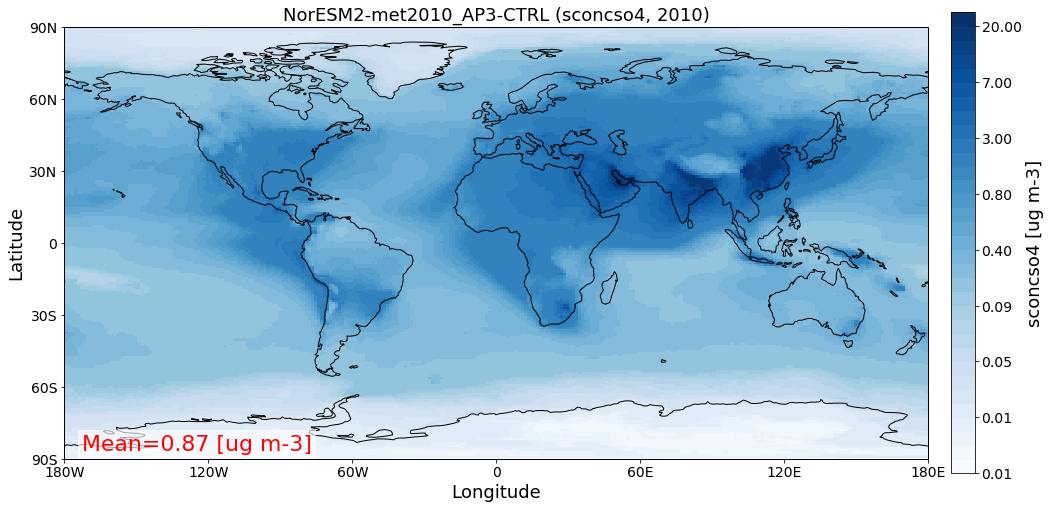

In [5]:
modeldata.resample_time('yearly').quickplot_map();

### Read EBAS surface concentration of SO4

In [6]:
obsdata = pya.io.ReadUngridded().read(obs_id, 'concso4').set_flags_nan()
obsdata 

UngriddedData <networks: ['EBASMC']; vars: ['concso4']; instruments: ['A_Teflonfilter_02', 'leckel_1', 'f1p_02', 'f3p_02', 'hvs_02', 'Thermo_5020_SPA_at02', 'f1p_1', 'f1p_4', 'f3p_4', 'filter_3pack_02', 'filter_3pack_03', 'filter_3pack_06', 'filter_3pack_08', 'filter_3pack_11_1', 'filterpack_CA0082', 'filter_3pack_12', 'filter_3pack_13', 'filter_3pack_15', 'filter_3pack_17', 'filter_3pack_18', 'filter_3pack_19', 'filter_3pack_22', 'filter_3pack_23', 'filter_3pack_79_2', '305-2000', 'f1p_01', 'teflon_and_nylon_filter_tsp', 'mpss_1', 'digitel_1', 'Digitel_02', 'mpss_2', 'mpsn_2', 'digitel_2', 'leckel_2', 'f1p_03', 'f1p_04', 'f1p_05', 'mpss_5', 'mpss_51', 'digitel_5', 'lvs_02', 'hvs_pm10_02', 'f2p_01', 'air_sampler_1', 'f3p_1', 'f3p_01', 'f2p_03', 'air_sampler_03', 'f3p_03', 'f3p_5', 'f19_5', 'IC_DE03L', 'lvs_1d_02', 'UBA_Wa_3FP_0001', 'lvs_1d_03', 'UBA_Sc_3FP_0001', 'f3p_04', 'f1p_2', 'f1p_07', 'NA', 'f3p_07', 'lvs_1d_07', 'UBA_Ng_3FP_0001', 'f1p_08', 'lvs_1d_08', 'f1p_09', 'f3p_09', 'lv

#### Plot all stations that have data in 2010

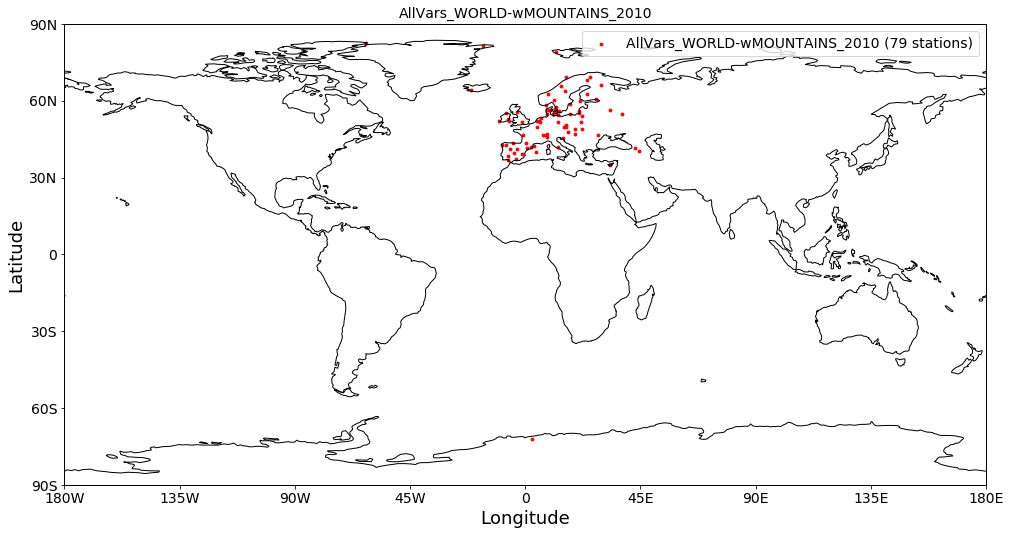

In [7]:
obsdata.plot_station_coordinates(start=2010)

Seems like there is only data in europe for 2010.

### Colocate model output with EBAS data (NOTE: `var_ref` need to be specified since model uses variable name `sconcso4`)

In [11]:
coldata = pya.colocation.colocate_gridded_ungridded(modeldata, obsdata, ts_type='monthly', var_ref='concso4')

Setting concso4 outlier lower lim: -8999999999999999897486646837248.00
Setting concso4 outlier upper lim: 8999999999999999897486646837248.00
Ignoring multiplication factor 3 in data with resolution 3daily in resampling method
Ignoring multiplication factor 3 in data with resolution 3daily in resampling method
Ignoring multiplication factor 3 in data with resolution 3daily in resampling method


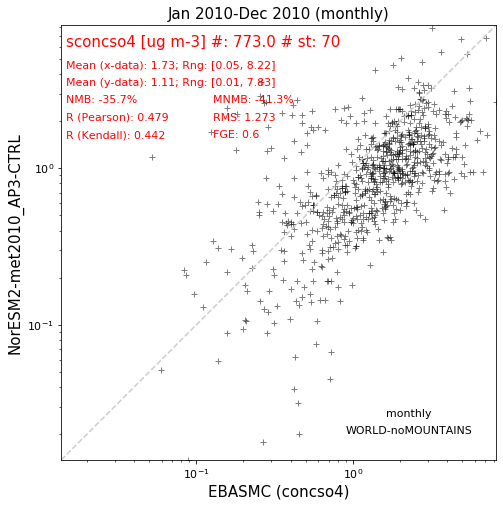

In [12]:
coldata.plot_scatter();

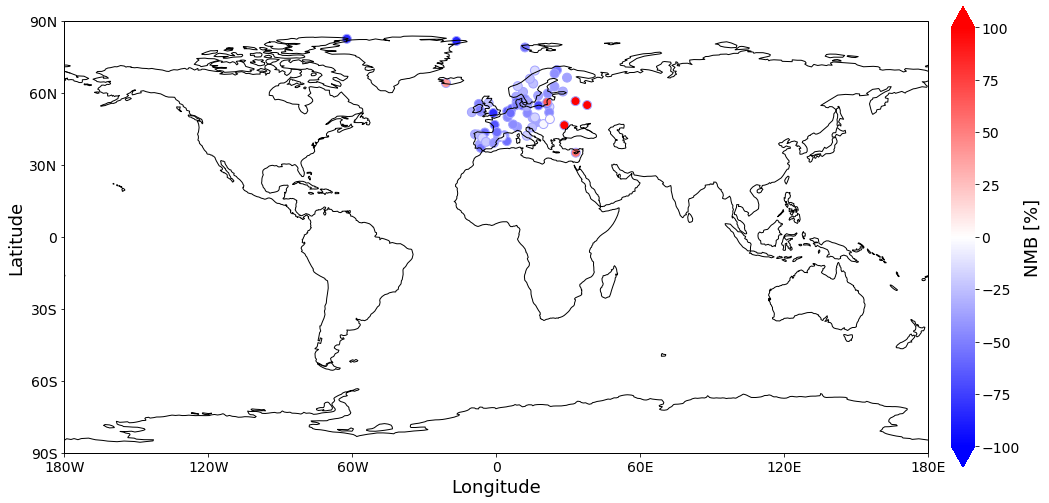

In [14]:
pya.plot.mapping.plot_nmb_map_colocateddata(coldata);

### Read sulphur concentrations from Aas et al., 2017 and compare results

In [16]:
obsdata1 = pya.io.ReadUngridded().read('GAWTADsubsetAasEtAl', 'concso4')
obsdata1

UngriddedData <networks: ['GAWTADsubsetAasEtAl']; vars: ['concso4']; instruments: ['3_stage_filterpack', 'IMPROVE_PM2.5', 'filter-1pack', 'filter_1pack', 'filter_3pack', 'filter_2pack', 'pm10_sampler', 'filter_denuder_sampler', 'filter-3pack'];No. of stations: 346

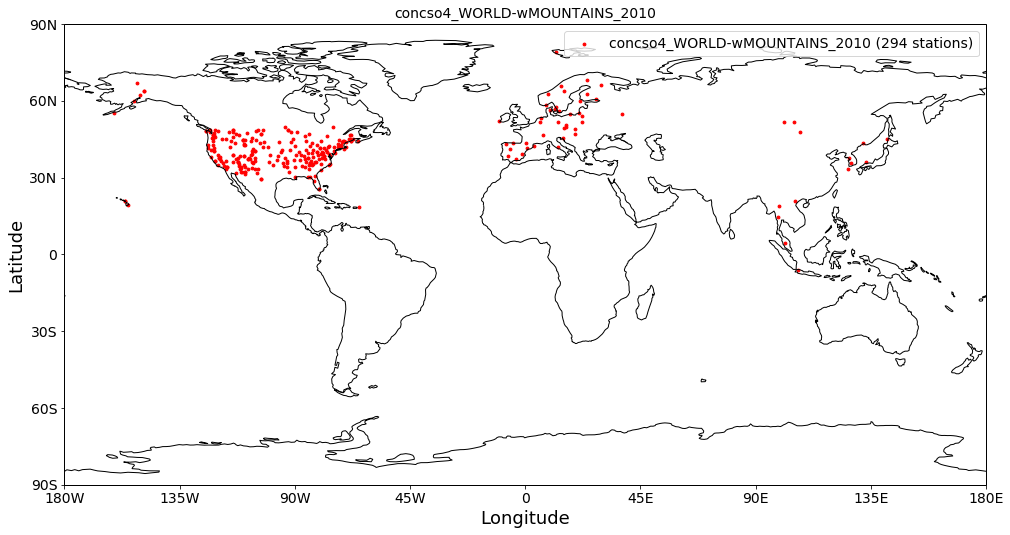

In [18]:
obsdata1.plot_station_coordinates(start=2010, var_name='concso4');

This dataset also contains sites outside of europe.

In [19]:
coldata1 = pya.colocation.colocate_gridded_ungridded(modeldata, obsdata1, ts_type='monthly', var_ref='concso4',
                                                     filter_name='WORLD-wMOUNTAINS') # these data is missing altitude information

Setting concso4 outlier lower lim: -8999999999999999897486646837248.00
Setting concso4 outlier upper lim: 8999999999999999897486646837248.00


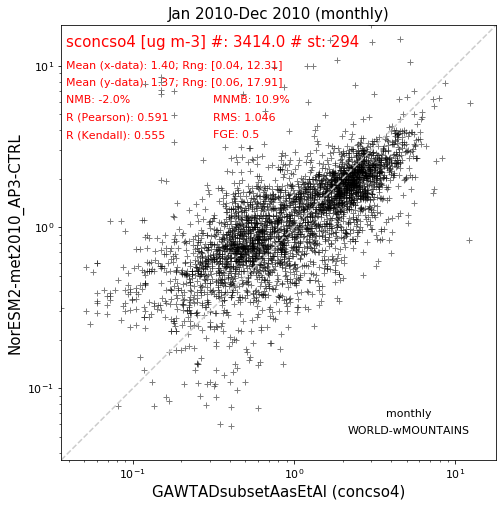

In [21]:
coldata1.plot_scatter();

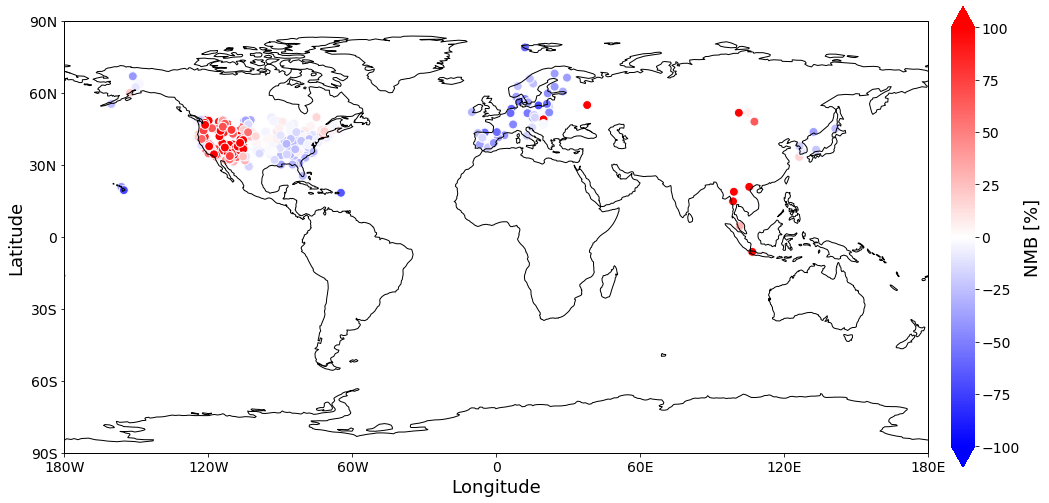

In [22]:
pya.plot.mapping.plot_nmb_map_colocateddata(coldata1);

### Use climatological timeseries from observations instead of only 2010

In [23]:
coldata2 = pya.colocation.colocate_gridded_ungridded(modeldata, obsdata1, ts_type='monthly', var_ref='concso4',
                                                     use_climatology_ref=True,
                                                     filter_name='WORLD-wMOUNTAINS') 

Setting concso4 outlier lower lim: -8999999999999999897486646837248.00
Setting concso4 outlier upper lim: 8999999999999999897486646837248.00


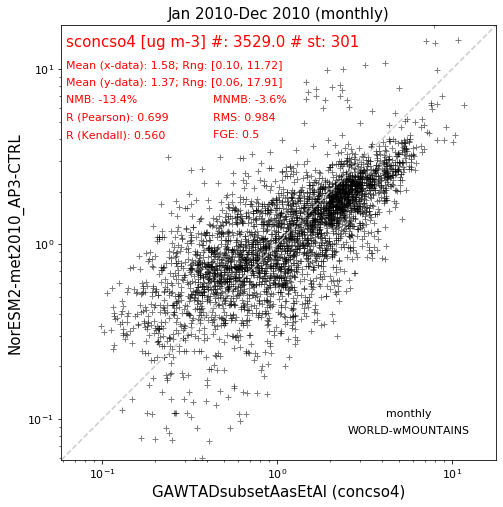

In [25]:
coldata2.plot_scatter();

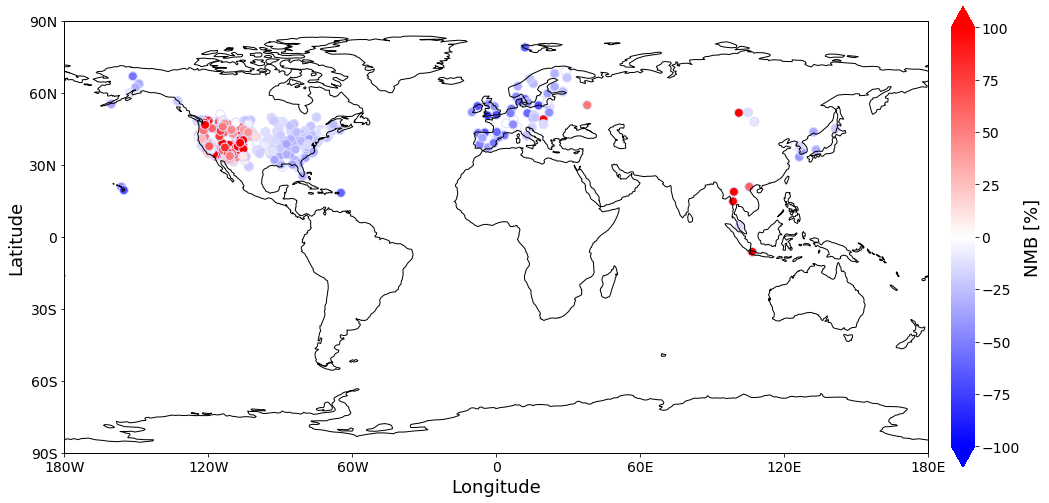

In [27]:
pya.plot.mapping.plot_nmb_map_colocateddata(coldata2);